/tmp/ipykernel_26115/2205060879.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cores = plt.cm.get_cmap('viridis', len(temperaturas_unicas))


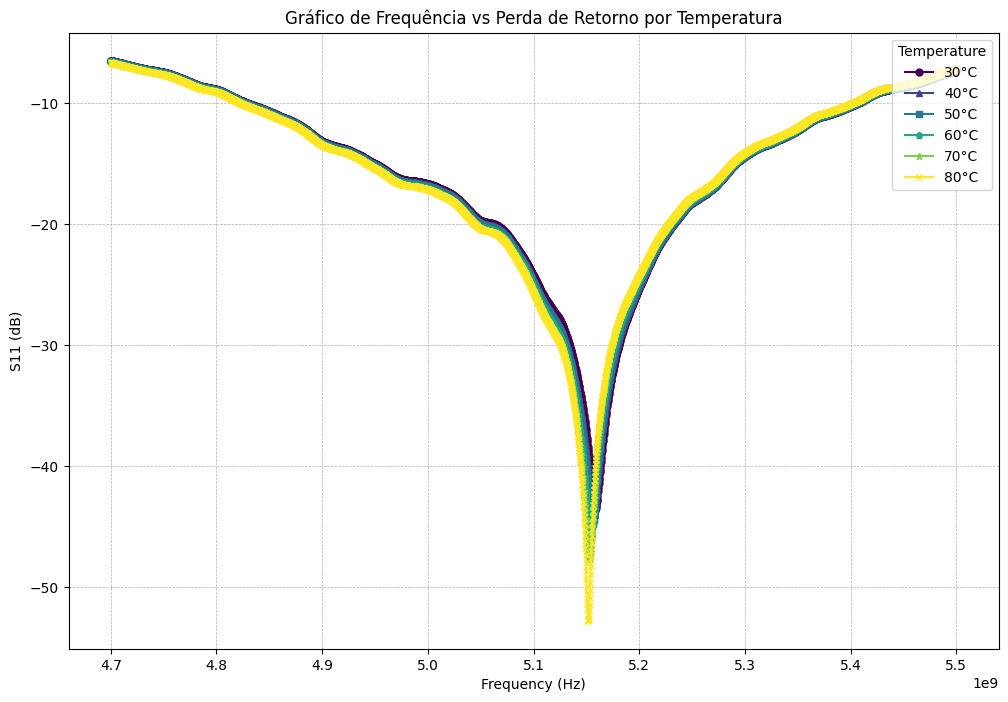

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def ler_e_concatenar_diretorio(diretorio):
    arquivos_prn = [os.path.join(diretorio, arquivo) for arquivo in os.listdir(diretorio) if arquivo.endswith('.prn')]
    lista_dfs = []
    for arquivo in arquivos_prn:
        df = pd.read_csv(arquivo, skiprows=1, index_col=False)
        temperatura = int(os.path.basename(arquivo).split('.')[0])  # Extrai a temperatura do nome do arquivo
        df['Temperatura'] = f"{temperatura}°C"  # Adiciona a temperatura como uma coluna
        lista_dfs.append(df)
    return pd.concat(lista_dfs, ignore_index=True)

def plotar_graficos_temperatura(df, salvar_como=None):
    plt.figure(figsize=(12, 8))
    temperaturas_unicas = df['Temperatura'].unique()
    marcadores = ['o', '^', 's', 'p', '*', 'x', 'd']  # Lista de marcadores
    cores = plt.cm.get_cmap('viridis', len(temperaturas_unicas))
    for indice, temperatura in enumerate(sorted(temperaturas_unicas, key=lambda x: int(x[:-2]))):
        dados_temperatura = df[df['Temperatura'] == temperatura]
        plt.plot(dados_temperatura['Frequency (Hz)'], dados_temperatura['dB'], label=temperatura,
                 color=cores(indice), marker=marcadores[indice % len(marcadores)], linestyle='-', markersize=5)
    plt.title('Gráfico de Frequência vs Perda de Retorno por Temperatura')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('S11 (dB)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(title='Temperature', loc='upper right')
    if salvar_como:
        plt.savefig(salvar_como, format='png', dpi=300)  # Salva o gráfico em alta resolução
    plt.show()

# Caminho para a pasta com arquivos PRN
diretorio_prn = 'STS_pura'

# Carregar e concatenar dados
dados_concatenados = ler_e_concatenar_diretorio(diretorio_prn)

# Nome do arquivo para salvar o gráfico
nome_arquivo_grafico = 'Sample STS_test.png'

# Plotar gráficos ajustados para temperatura e salvar
plotar_graficos_temperatura(dados_concatenados, nome_arquivo_grafico)


### Analisar o Tf

Para determinar o coeficiente de temperatura da frequência de ressonância (τf) conforme descrito na equação fornecida e na metodologia Silva-Fernandes-Sombra (SFS), podemos construir um script Python. O τf é calculado usando a fórmula:

$$
\tau_f = \frac{1}{f_0} \frac{\Delta f}{\Delta T} \times 10^6 \, \text{ppm/°C}
$$

Onde:

- $f_0$ é a frequência de ressonância no início do processo (geralmente a menor temperatura),
- $\Delta f$ é a diferença entre a frequência de ressonância final e inicial,
- $\Delta T$ é a diferença entre a temperatura final e inicial.

### Passos para o Script

1. **Coletar Dados**: Primeiro, você precisa dos dados de frequência de ressonância para cada temperatura.
2. **Calcular Diferenças**: Calcular $\Delta f$ e $\Delta T$.
3. **Calcular τf**: Usar a fórmula para encontrar o valor de τf.


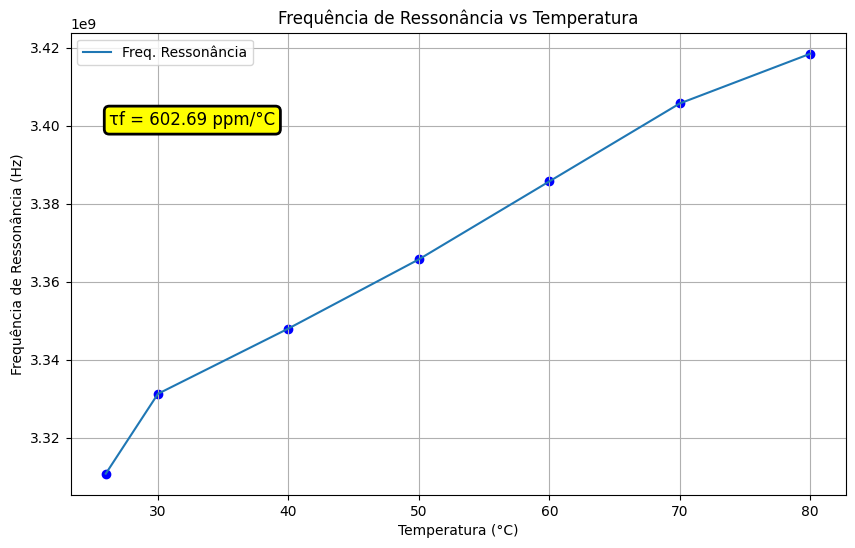

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def ler_dados_e_calcular_f_resonancia(diretorio):
    arquivos_prn = [os.path.join(diretorio, f) for f in os.listdir(diretorio) if f.endswith('.prn')]
    ressonancias = []

    for arquivo in arquivos_prn:
        df = pd.read_csv(arquivo, skiprows=1, index_col=False)
        temperatura = int(os.path.splitext(os.path.basename(arquivo))[0])  # Extraindo a temperatura do nome do arquivo
        freq_ressonancia = df.loc[df['dB'].idxmin(), 'Frequency (Hz)']
        ressonancias.append((temperatura, freq_ressonancia))

    return pd.DataFrame(ressonancias, columns=['Temperatura (°C)', 'Frequência (Hz)']).sort_values(by='Temperatura (°C)')

def calcular_tau_f(ressonancias):
    f0 = ressonancias['Frequência (Hz)'].iloc[0]
    T0 = ressonancias['Temperatura (°C)'].iloc[0]
    f_final = ressonancias['Frequência (Hz)'].iloc[-1]
    T_final = ressonancias['Temperatura (°C)'].iloc[-1]
    delta_f = f_final - f0
    delta_T = T_final - T0
    tau_f = (1 / f0) * (delta_f / delta_T) * 1e6
    return tau_f

def plotar_ressonancia_com_tau_f(ressonancias, tau_f):
    plt.figure(figsize=(10, 6))
    plt.scatter(ressonancias['Temperatura (°C)'], ressonancias['Frequência (Hz)'], color='blue')
    plt.plot(ressonancias['Temperatura (°C)'], ressonancias['Frequência (Hz)'], label='Freq. Ressonância')
    plt.title('Frequência de Ressonância vs Temperatura')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Frequência de Ressonância (Hz)')
    plt.grid(True)
    plt.legend()
    # Anotando o valor de τf
    plt.annotate(f'τf = {tau_f:.2f} ppm/°C', xy=(0.05, 0.80), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=2))
    plt.savefig('grafico_frequencia_temperatura_25%.png', dpi=300)
    plt.show()

# Caminho para a pasta com arquivos PRN
diretorio_prn = 'STS_25__TiO2'

# Lendo dados e calculando frequências de ressonância
dados_ressonancia = ler_dados_e_calcular_f_resonancia(diretorio_prn)

# Calculando τf
tau_f = calcular_tau_f(dados_ressonancia)

# Plotando gráfico e anotando τf
plotar_ressonancia_com_tau_f(dados_ressonancia, tau_f)


Descrição Estatística dos Dados:
        Temperatura
count  19212.000000
mean      55.000000
std       17.078696
min       30.000000
25%       40.000000
50%       55.000000
75%       70.000000
max       80.000000

Contagem de dados por temperatura:
Temperatura
30    3202
70    3202
40    3202
60    3202
80    3202
50    3202
Name: count, dtype: int64


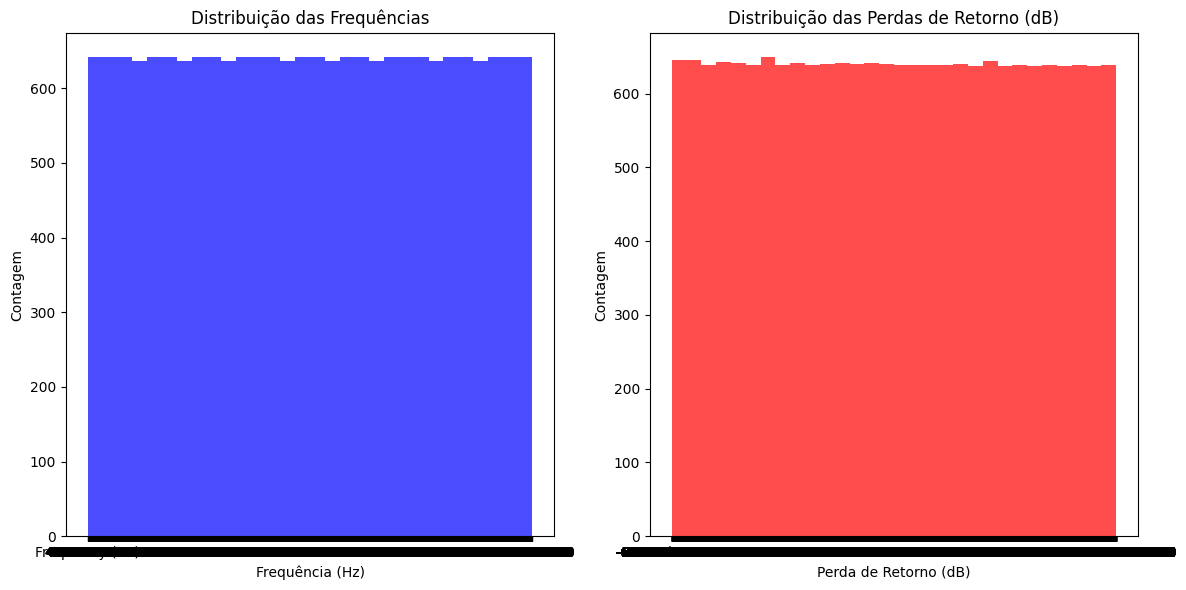

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def carregar_dados(diretorio):
    dfs = []
    for filename in os.listdir(diretorio):
        if filename.endswith('.prn'):
            file_path = os.path.join(diretorio, filename)
            temperatura = int(filename.split('.')[0])
            df = pd.read_csv(file_path, skiprows=1, names=['Frequency (Hz)', 'dB'], index_col=False)
            df['Temperatura'] = temperatura
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

def descrever_dados(df):
    print("Descrição Estatística dos Dados:")
    print(df.describe())
    
    print("\nContagem de dados por temperatura:")
    print(df['Temperatura'].value_counts())

def visualizar_dados(df):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(df['Frequency (Hz)'], bins=30, color='blue', alpha=0.7)
    plt.title('Distribuição das Frequências')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Contagem')

    plt.subplot(1, 2, 2)
    plt.hist(df['dB'], bins=30, color='red', alpha=0.7)
    plt.title('Distribuição das Perdas de Retorno (dB)')
    plt.xlabel('Perda de Retorno (dB)')
    plt.ylabel('Contagem')

    plt.tight_layout()
    plt.show()

# Caminho para a pasta com arquivos PRN
diretorio_prn = 'STS_pura'

# Carregar dados
dados = carregar_dados(diretorio_prn)

# Descrição dos dados
descrever_dados(dados)

# Visualização dos dados
visualizar_dados(dados)
